In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [3]:
stroke = pd.read_csv('Heart_Strokes.csv')
stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [4]:
stroke['stroke'].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

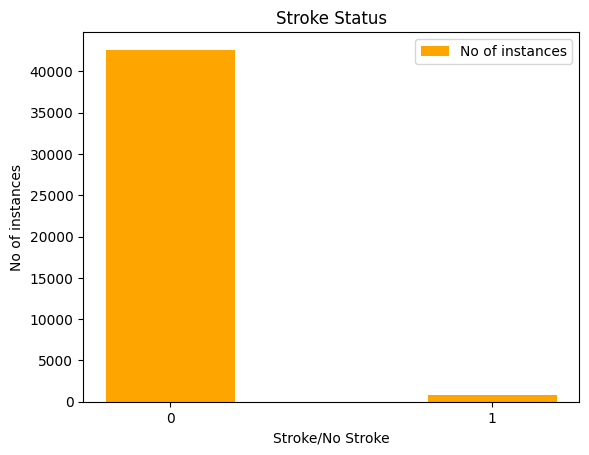

In [7]:
strokeStatus=dict(stroke['stroke'].value_counts())
import matplotlib.pyplot as plt
models=list(strokeStatus.keys())
xpos=np.arange(len(models))
plt.xticks(xpos,models)
plt.title('Stroke Status')
plt.ylabel('No of instances')
plt.xlabel('Stroke/No Stroke')
plt.bar(xpos,list(strokeStatus.values()),width=0.4,color='orange',label='No of instances')
plt.legend()

In [8]:
stroke.shape

(43400, 12)

In [9]:
stroke.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [10]:
stroke['smoking_status'].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [11]:
stroke['smoking_status'] = stroke['smoking_status'].fillna('No_Info')

In [12]:
stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,No_Info,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,No_Info,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,No_Info,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,No_Info,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [13]:
stroke = stroke.drop(['id'], axis = 1)
stroke.shape

(43400, 11)

In [14]:
stroke['bmi'] = stroke['bmi'].fillna('0')

In [15]:
avg = 0
c = 0
for i in range(43400):
  if stroke.bmi[i] != '0':
    avg += stroke.bmi[i]
    c += 1
avg = avg/c
print(avg)

28.605038390004545


In [16]:
stroke['bmi'] = stroke['bmi'].replace({'0':28.605038390004545})

In [17]:
stroke.head(100)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.000000,No_Info,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.200000,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.600000,No_Info,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.900000,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.100000,No_Info,0
...,...,...,...,...,...,...,...,...,...,...,...
95,Male,34.0,0,1,Yes,Private,Urban,106.23,28.605038,formerly smoked,0
96,Male,64.0,0,0,Yes,Govt_job,Urban,239.64,34.600000,formerly smoked,0
97,Female,66.0,0,0,Yes,Self-employed,Urban,58.95,24.600000,never smoked,0
98,Female,23.0,0,0,No,Private,Urban,99.92,25.800000,never smoked,0


# Feature Engineering

In [18]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     43400 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [19]:
stroke['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [20]:
stroke_enc = pd.get_dummies(stroke['gender'])
stroke_enc.head()

,Female,Male,Other
0,False,True,False
1,False,True,False
2,True,False,False
3,True,False,False
4,False,True,False


In [21]:
stroke['Male'] = stroke_enc['Male']
stroke['Female'] = stroke_enc['Female']
stroke['Other'] = stroke_enc['Other']

In [22]:
stroke = stroke.drop(['gender'], axis = 1)
stroke.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Female,Other
0,3.0,0,0,No,children,Rural,95.12,18.0,No_Info,0,True,False,False
1,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,True,False,False
2,8.0,0,0,No,Private,Urban,110.89,17.6,No_Info,0,False,True,False
3,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,False,True,False
4,14.0,0,0,No,Never_worked,Rural,161.28,19.1,No_Info,0,True,False,False


In [23]:
stroke['ever_married'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
stroke['ever_married'] = stroke['ever_married'].map({'Yes':1,'No':0})

In [25]:
stroke['smoking_status'].unique()

array(['No_Info', 'never smoked', 'formerly smoked', 'smokes'],
      dtype=object)

In [26]:
stroke['smoking_status'] = stroke['smoking_status'].map({'smokes':3,'formerly smoked':2, 'No_Info':1.5, 'never smoked':0}) 

In [27]:
stroke_enc = pd.get_dummies(stroke['work_type'])
stroke_enc.head()

,Govt_job,Never_worked,Private,Self-employed,children
0,False,False,False,False,True
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,True,False,False,False


In [28]:
stroke['Govt_job'] = stroke_enc['Govt_job']
stroke['Never_worked'] = stroke_enc['Never_worked']
stroke['Private'] = stroke_enc['Private']
stroke['children'] = stroke_enc['children']

In [29]:
stroke = stroke.drop(['work_type'], axis = 1)

In [30]:
stroke_enc1 = pd.get_dummies(stroke['Residence_type'])
stroke_enc1.head()

,Rural,Urban
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False


In [31]:
to_drop = ['Residence_type']

stroke = stroke.drop(to_drop, axis=1)

In [32]:
stroke.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,Male,Female,Other,Govt_job,Never_worked,Private,children
0,3.0,0,0,0,95.12,18.0,1.5,0,True,False,False,False,False,False,True
1,58.0,1,0,1,87.96,39.2,0.0,0,True,False,False,False,False,True,False
2,8.0,0,0,0,110.89,17.6,1.5,0,False,True,False,False,False,True,False
3,70.0,0,0,1,69.04,35.9,2.0,0,False,True,False,False,False,True,False
4,14.0,0,0,0,161.28,19.1,1.5,0,True,False,False,False,True,False,False


In [33]:
stroke['stroke_target'] = stroke['stroke']

In [34]:
stroke = stroke.drop('stroke', axis=1)

In [35]:
stroke_corr = stroke.corr()
stroke_corr

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,Male,Female,Other,Govt_job,Never_worked,Private,children,stroke_target
age,1.000000,0.272169,0.250188,0.693070,0.237627,0.352236,0.006287,-0.027603,0.027768,-0.005168,0.115651,-0.069509,0.143657,-0.641240,0.156049
hypertension,0.272169,1.000000,0.119777,0.176575,0.160211,0.153779,-0.001062,0.024070,-0.023902,-0.005116,0.020065,-0.019319,0.007236,-0.130171,0.075332
heart_disease,0.250188,0.119777,1.000000,0.128833,0.146938,0.054133,0.056023,0.082393,-0.082270,-0.003556,-0.002441,-0.014292,-0.006327,-0.089559,0.113763
ever_married,0.693070,0.176575,0.128833,1.000000,0.153607,0.337517,0.013027,-0.030982,0.031183,-0.006290,0.135298,-0.080734,0.158857,-0.546495,0.071920
avg_glucose_level,0.237627,0.160211,0.146938,0.153607,1.000000,0.184199,0.017865,0.035888,-0.035695,-0.005841,0.023014,-0.014516,0.008048,-0.114174,0.078917
bmi,0.352236,0.153779,0.054133,0.337517,0.184199,1.000000,-0.022156,-0.021536,0.021565,-0.000935,0.093567,-0.021608,0.200884,-0.454870,0.018407
smoking_status,0.006287,-0.001062,0.056023,0.013027,0.017865,-0.022156,1.000000,0.089963,-0.090136,0.005596,-0.008418,-0.023432,-0.026192,0.047668,0.011789
Male,-0.027603,0.024070,0.082393,-0.030982,0.035888,-0.021536,0.089963,1.000000,-0.999476,-0.013229,-0.013538,0.002733,-0.052100,0.089076,0.011352
Female,0.027768,-0.023902,-0.082270,0.031183,-0.035695,0.021565,-0.090136,-0.999476,1.000000,-0.019154,0.013449,-0.002700,0.052028,-0.089127,-0.011281
Other,-0.005168,-0.005116,-0.003556,-0.006290,-0.005841,-0.000935,0.005596,-0.013229,-0.019154,1.000000,0.002716,-0.001019,0.002065,0.001824,-0.002158


In [36]:
stroke.describe()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke_target
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,0.643733,104.482750,28.605038,1.258295,0.018041
std,22.519649,0.291235,0.212733,0.478901,43.111751,7.638023,1.075734,0.133103
min,0.080000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,77.540000,23.400000,0.000000,0.000000
50%,44.000000,0.000000,0.000000,1.000000,91.580000,28.100000,1.500000,0.000000
75%,60.000000,0.000000,0.000000,1.000000,112.070000,32.600000,2.000000,0.000000
max,82.000000,1.000000,1.000000,1.000000,291.050000,97.600000,3.000000,1.000000


<Axes: >

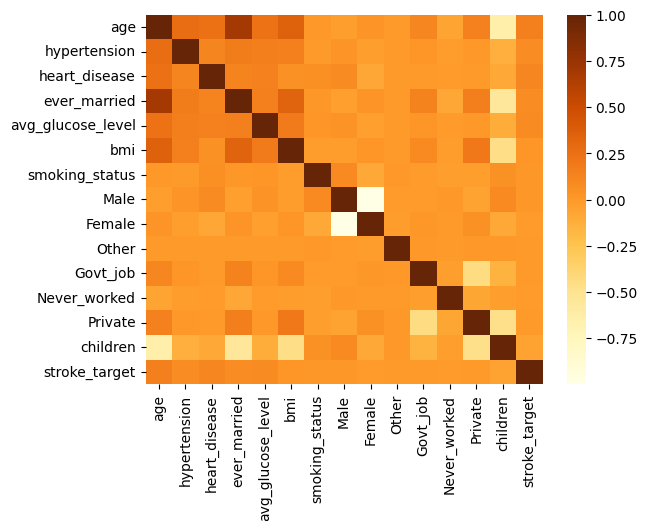

In [37]:
import seaborn as sns

sns.heatmap(stroke_corr, cmap = 'YlOrBr')

# Train and Test

In [38]:
stroke.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,Male,Female,Other,Govt_job,Never_worked,Private,children,stroke_target
0,3.0,0,0,0,95.12,18.0,1.5,True,False,False,False,False,False,True,0
1,58.0,1,0,1,87.96,39.2,0.0,True,False,False,False,False,True,False,0
2,8.0,0,0,0,110.89,17.6,1.5,False,True,False,False,False,True,False,0
3,70.0,0,0,1,69.04,35.9,2.0,False,True,False,False,False,True,False,0
4,14.0,0,0,0,161.28,19.1,1.5,True,False,False,False,True,False,False,0


In [40]:
from sklearn.model_selection import train_test_split
X = stroke.iloc[:, :-1]
Y = stroke.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print(X_train.shape)
print(X_test.shape)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 age                   0.08
hypertension          0.00
heart_disease         0.00
ever_married          0.00
avg_glucose_level    55.00
bmi                  10.10
smoking_status        0.00
Male                  0.00
Female                0.00
Other                 0.00
Govt_job              0.00
Never_worked          0.00
Private               0.00
children              0.00
dtype: float64
per-feature maximum before scaling:
 age                   82.00
hypertension           1.00
heart_disease          1.00
ever_married           1.00
avg_glucose_level    291.05
bmi                   97.60
smoking_status         3.00
Male                   1.00
Female                 1.00
Other                  1.00
Govt_job               1.00
Never_worked           1.00
Private                1.00
children               1.00
dtype: float64


In [ ]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# KNeighborsClassifier

**MinMax Scaler**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train, Y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, Y_test)))

Test set accuracy: 0.98


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, Y_train)

print("Scaled test set accuracy: {:.2f}".format(
    knn.score(X_test_scaled, Y_test)))

Scaled test set accuracy: 0.98


**Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#instead of using .fit() and .transform() separately, we can use .fit_transform()
X_scaled_d = scaler.fit_transform(X_train)

In [ ]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
knn.fit(X_train_scaled, Y_train)

# scoring on the scaled test set
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled, Y_test)))

KNN test accuracy: 0.98


# Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X = stroke.iloc[:, :-1]
y = stroke.iloc[:, -1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [ ]:
#Train the model
model = LogisticRegression()
model.fit(X_train, y_train) #Training the model
predictions = model.predict(X_test)
predictions

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
LR_accuracy = accuracy_score(y_test, predictions)
print( "Accuracy using logistic regression: " + str(accuracy_score(y_test, predictions)))

Accuracy using logistic regression: 0.9836405529953917


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
DT_accuracy = accuracy_score(y_pred,y_test)
print("Accuracy using descision tree: " + str(DT_accuracy))

Accuracy using descision tree: 0.9626728110599079


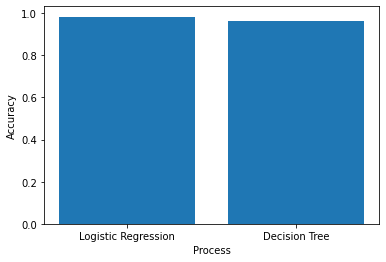

In [ ]:
x = ["Logistic Regression", "Decision Tree"]
y = [LR_accuracy, DT_accuracy]
plt.bar(x,y)
plt.xlabel("Process")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
# label data
X = stroke.iloc[:, :-1]
y = stroke.iloc[:, -1]

In [ ]:
#Lets split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.20)

In [ ]:
print("Training set: x->{} , y->{} \n Testing set: x->{} , y->{}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Training set: x->(34720, 14) , y->(34720,) 
 Testing set: x->(8680, 14) , y->(8680,)


# SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))

pre_train_svc = svc.score(x_train, y_train)
pre_test_svc = svc.score(x_test, y_test)

Training accuracy of the model is 0.98
Testing accuracy of the model is 0.98


In [ ]:
predictions = svc.predict(x_test)
print(predictions)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[8523  157]
 [   0    0]]


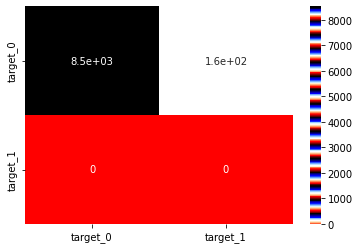

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="flag", xticklabels=['target_0' ,'target_1'], yticklabels=['target_0' ,'target_1'], annot=True)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))

pre_train_rfc = rfc.score(x_train, y_train)
pre_test_rfc = rfc.score(x_test, y_test) 

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.98


In [ ]:
predictions = rfc.predict(x_test)
print(predictions)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[8520  157]
 [   3    0]]


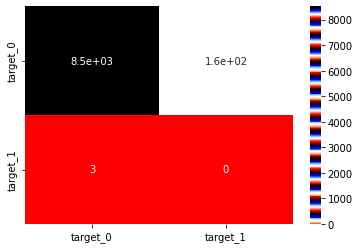

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="flag", xticklabels=['target_0' ,'target_1'], yticklabels=['target_0' ,'target_1'], annot=True)

# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [ ]:
nnc.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))

pre_train_nnc = nnc.score(x_train, y_train)
pre_test_nnc = nnc.score(x_test, y_test)

The Training accuracy of the model is 0.98
The Testing accuracy of the model is 0.98


In [ ]:
predictions = nnc.predict(x_test)
print(predictions)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[8523  157]
 [   0    0]]


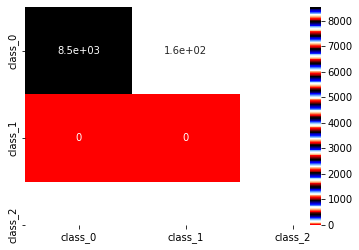

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="flag", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

# Comparing KNN, Logistic Regression, SVM and Decision Tree

In [ ]:
KNN_accuracy = 0.98 #from above

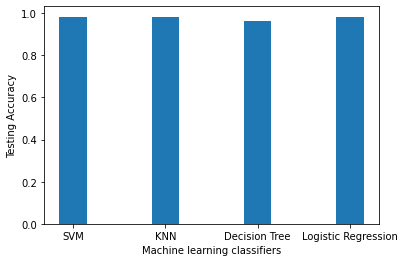

In [ ]:
x = ["SVM", "KNN", "Decision Tree", "Logistic Regression"]
y = [pre_test_svc, KNN_accuracy, DT_accuracy, LR_accuracy]

plt.bar(x,y, width = 0.3)
plt.xlabel("Machine learning classifiers")
plt.ylabel("Testing Accuracy")
plt.show()

# Error Rate Compare

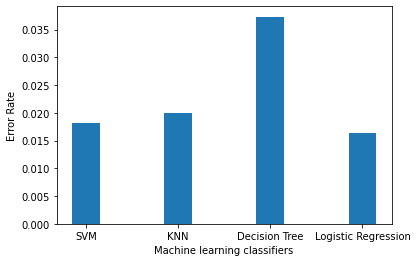

In [ ]:
SVM_error = 1 - pre_test_svc
KNN_error = 1 - KNN_accuracy
DT_error = 1 - DT_accuracy
LR_error = 1 - LR_accuracy

x = ["SVM", "KNN", "Decision Tree", "Logistic Regression"]
y = [SVM_error, KNN_error, DT_error, LR_error]

plt.bar(x,y, width = 0.3)
plt.xlabel("Machine learning classifiers")
plt.ylabel("Error Rate")
plt.show()